# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu^*}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$


## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib.data.func import (DataFunc)
from lib.data.schema import (DataType)
from lib.plots.data import (DataPlotType, stack, curve)
from lib.plots.func import (FuncPlotType, fcompare)
from lib.plots.cumu import (CumuPlotType, cumulative)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1.0
nsample = 1000

def plot_labels_φ(φ):
    return [f"φ={val}" for val in φ]

def plot_labels_μ(μ):
    return [r"$μ^*=$" + f"{val}" for val in μ]

def ar1_series_φ(φ_vals, μ):
    series = []
    for φ in φ_vals:
        series.append(arima.arp_offset([φ], μ, nsample, σ))
    return series

def ar1_series_μ(φ, μ_vals):
    series = []
    for μ in μ_vals:
        series.append(arima.arp_offset([φ], μ, nsample, σ))
    return series

## Simulation $\varphi$ Scan

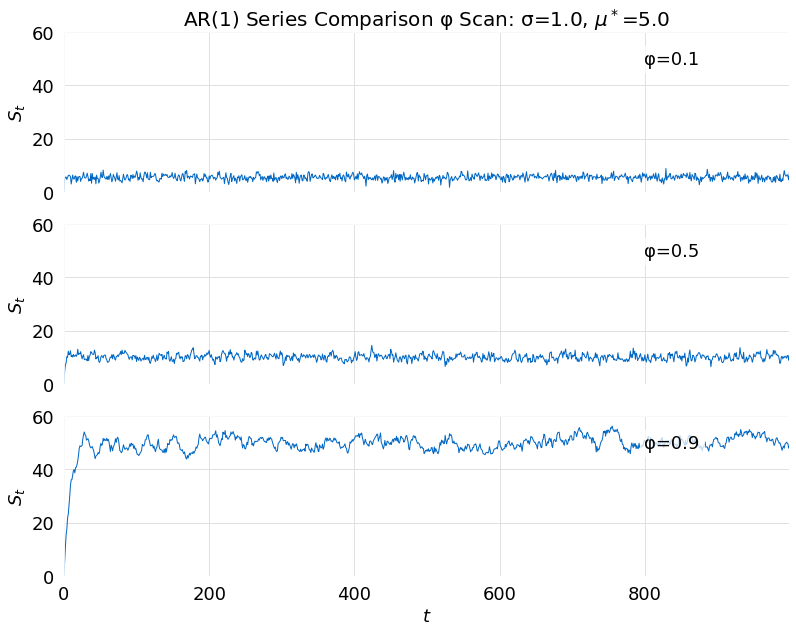

In [3]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ = numpy.array([0.1, 0.5, 0.9])
labels = plot_labels_φ(φ) 
series = ar1_series_φ(φ, μ)
stack(series, ylim=[0.0, 60.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

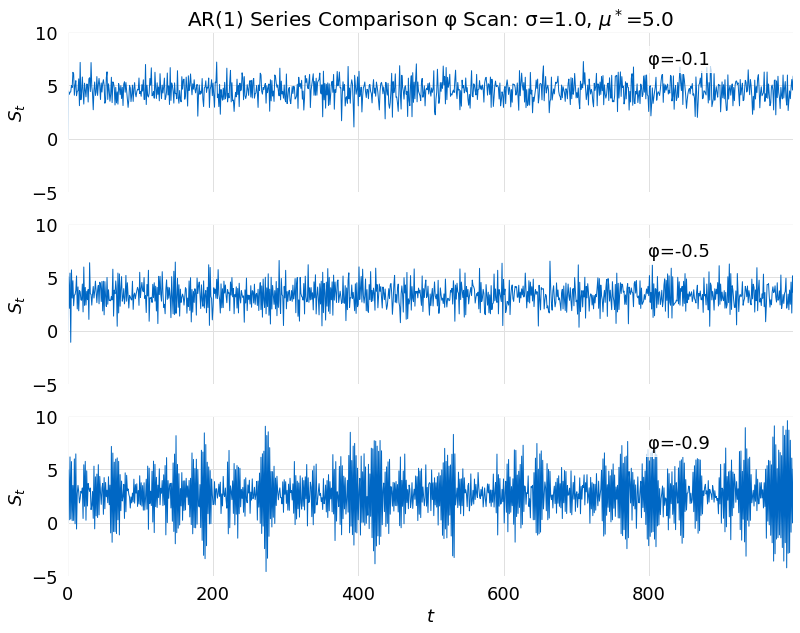

In [4]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ = numpy.array([-0.1, -0.5, -0.9])
labels = plot_labels_φ(φ) 
series = ar1_series_φ(φ, μ)
stack(series, ylim=[-5.0, 10.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Simulation $\mu^*$ Scan

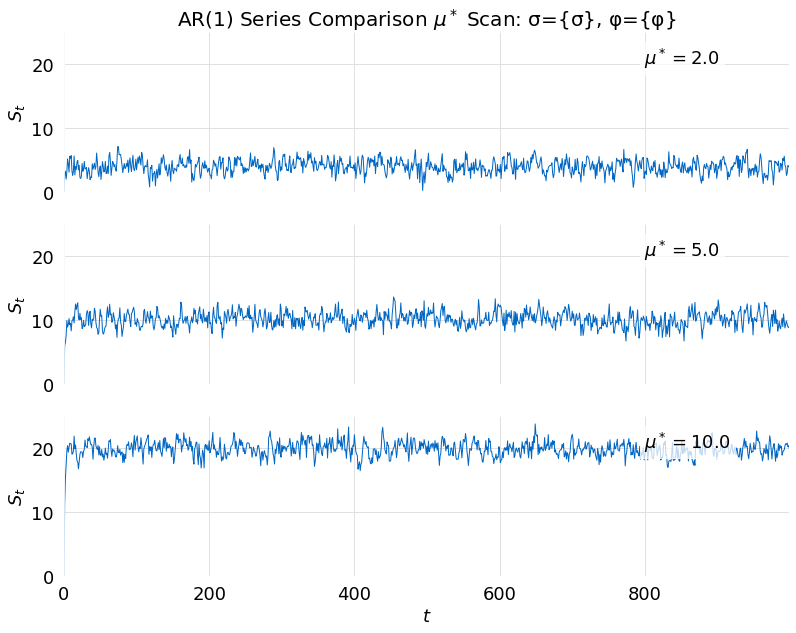

In [5]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + " Scan: σ={σ}, φ={φ}"
μ = numpy.array([2.0, 5.0, 10.0])
labels = plot_labels_μ(μ) 
series = ar1_series_μ(φ, μ)
stack(series, ylim=[0.0, 25.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

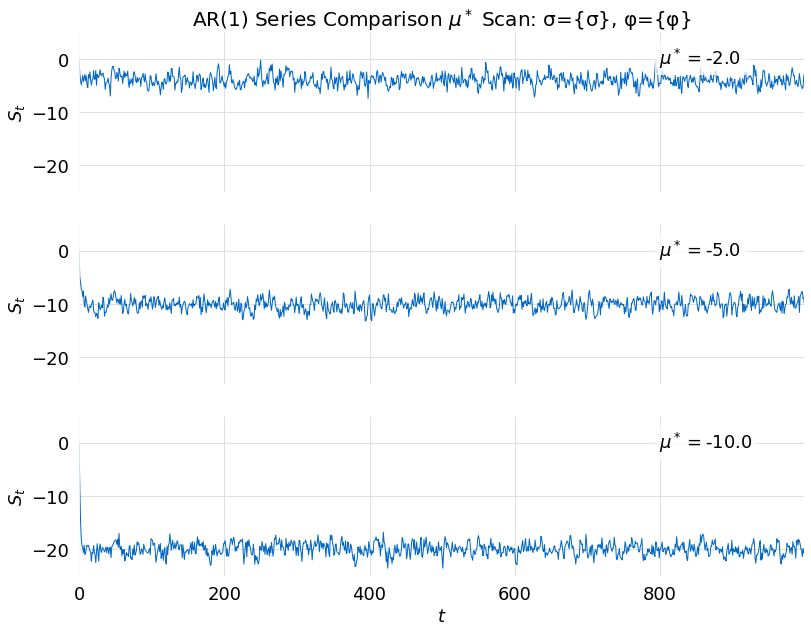

In [6]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + " Scan: σ={σ}, φ={φ}"
μ = numpy.array([-2.0, -5.0, -10.0])
labels = plot_labels_μ(μ) 
series = ar1_series_μ(φ, μ)
stack(series, ylim=[-25.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Mean

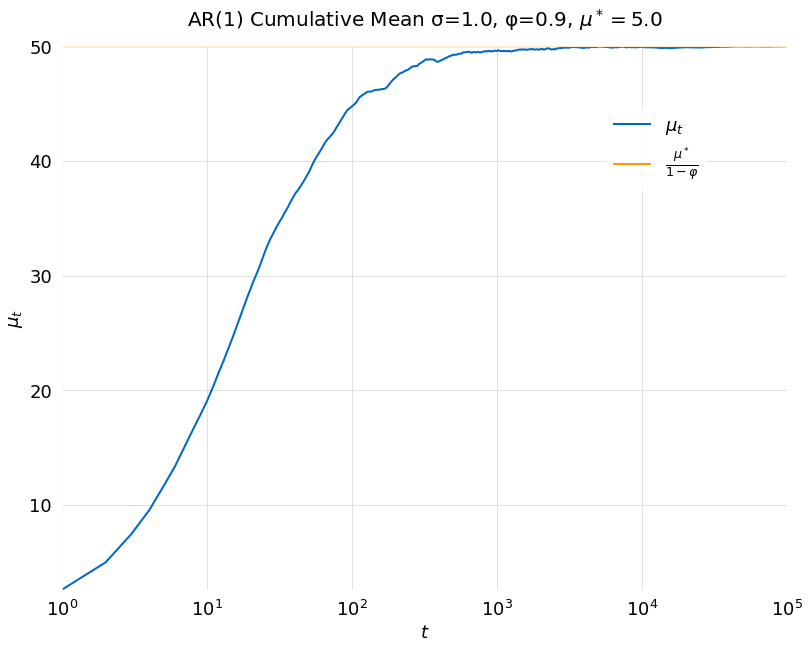

In [7]:
φ = 0.9
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

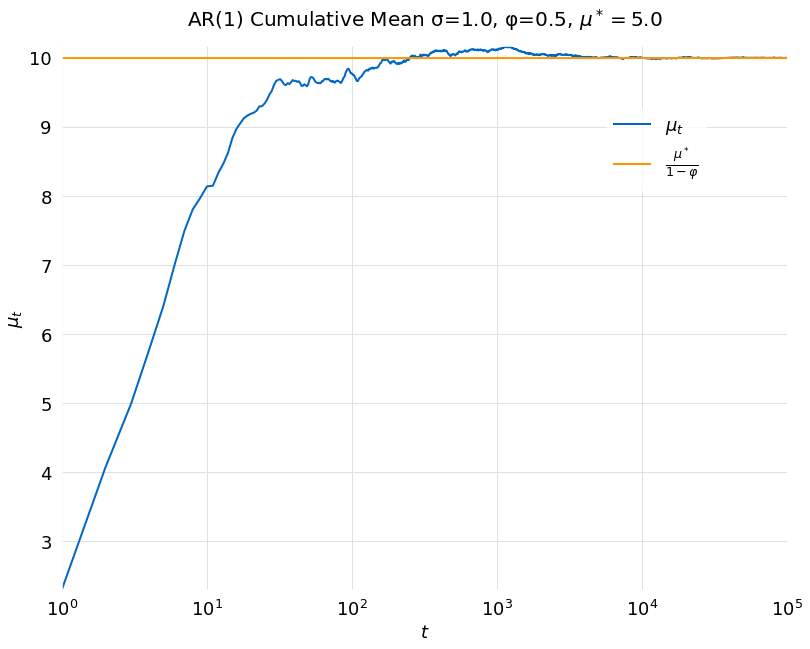

In [8]:
φ = 0.5
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

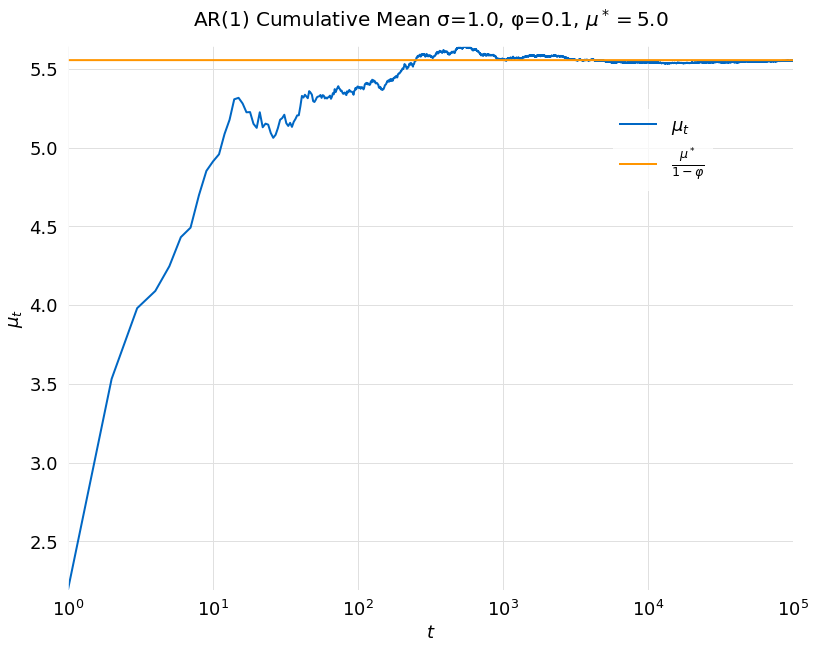

In [9]:
φ = 0.1
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

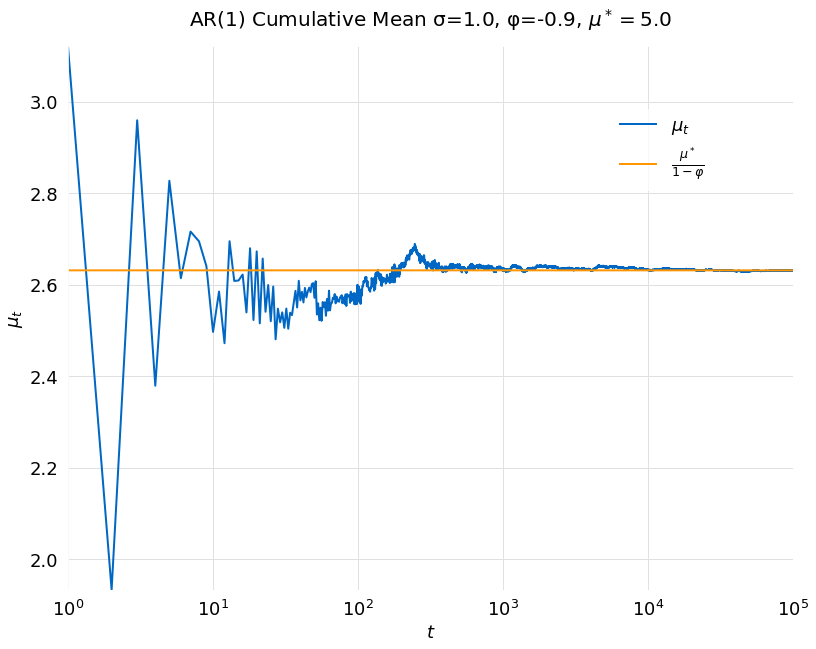

In [10]:
φ = -0.9
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

## Standard Deviation

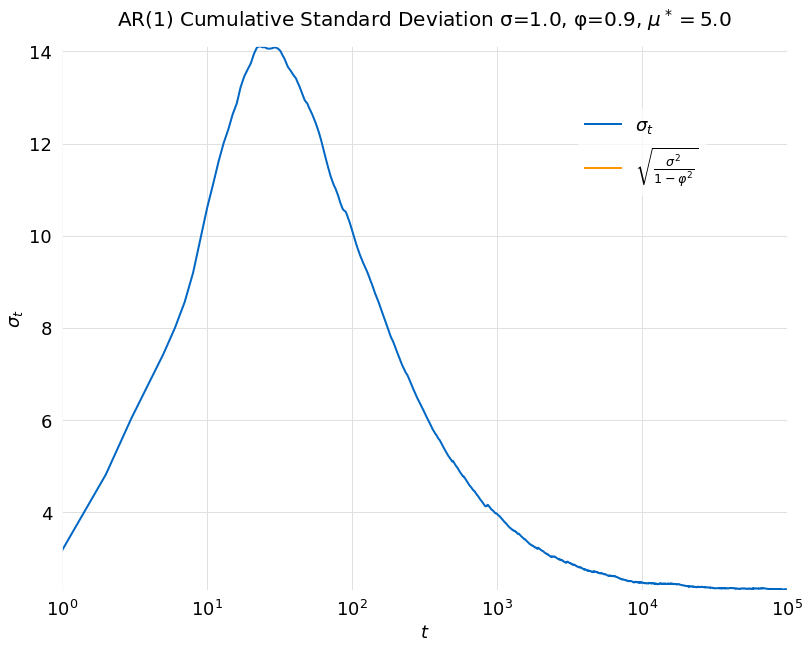

In [11]:
φ = 0.9
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_SD)
cumulative(data, CumuPlotType.AR1_OFFSET_SD, title=title, title_offset=1.025, φ=φ, μ=μ)

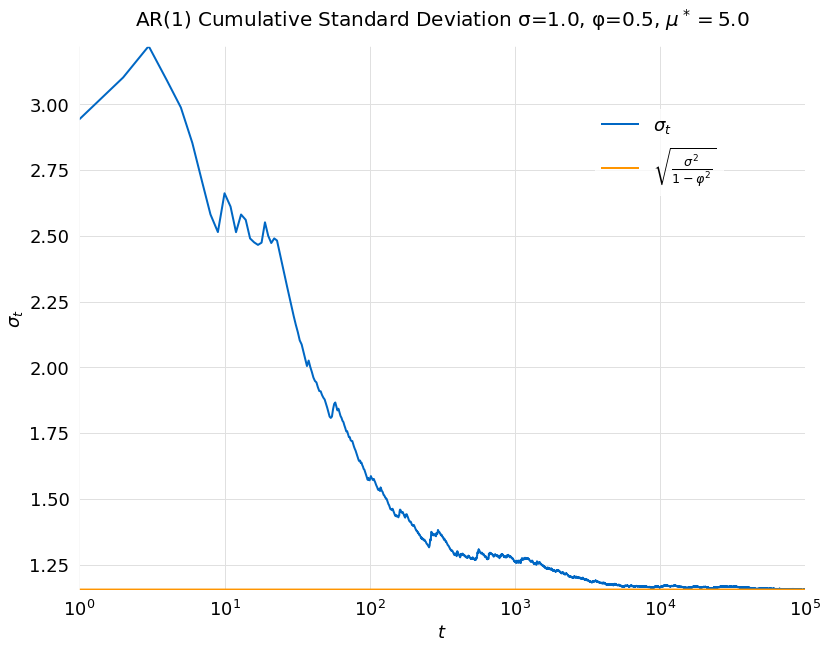

In [12]:
φ = 0.5
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_SD)
cumulative(data, CumuPlotType.AR1_OFFSET_SD, title=title, title_offset=1.025, φ=φ, μ=μ)

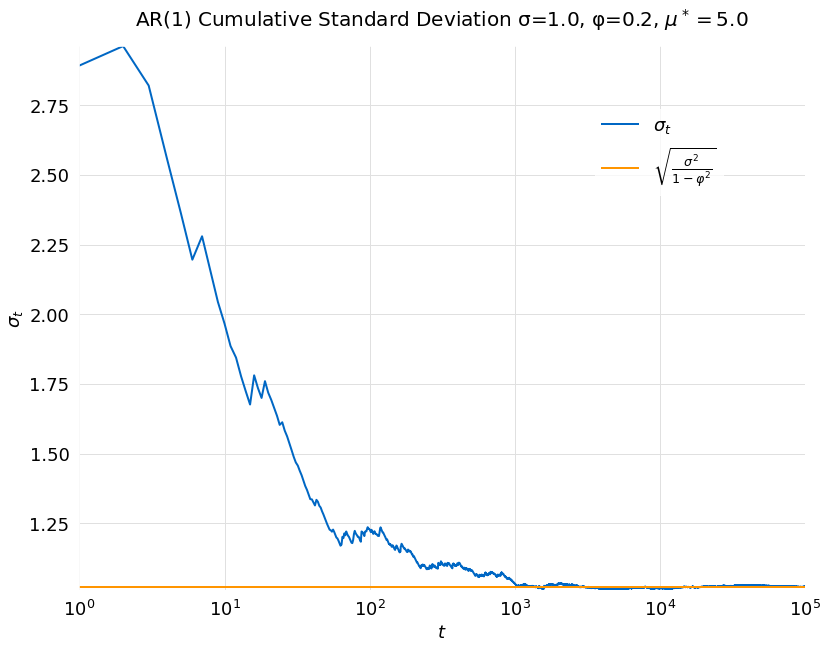

In [13]:
φ = 0.2
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_SD)
cumulative(data, CumuPlotType.AR1_OFFSET_SD, title=title, title_offset=1.025, φ=φ, μ=μ)

## Parameter Estimation

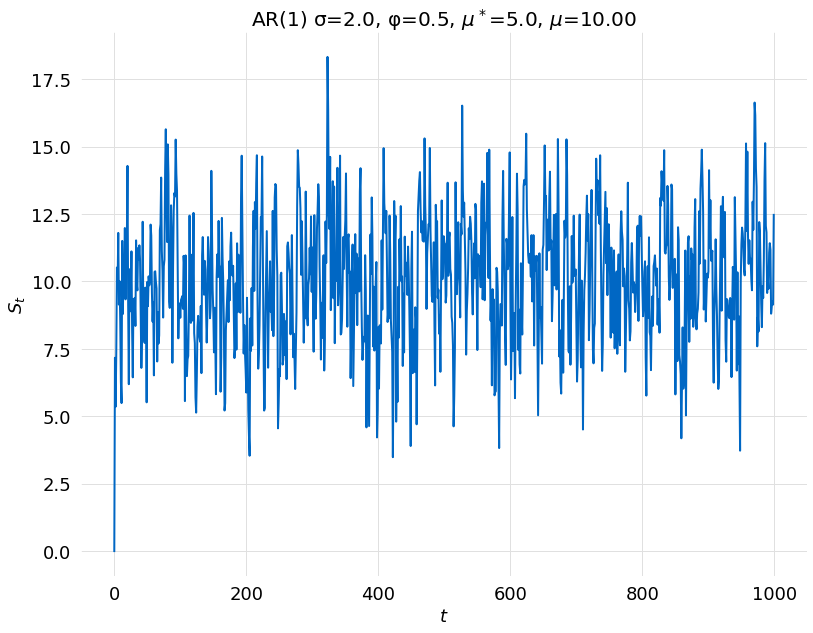

In [14]:
φ = 0.5
μ = 5.0
σ = 2.0
nsample = 1000
df = arima.arp_offset([φ], μ, nsample, σ)
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*$=" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
curve(df, plot_type=DataPlotType.TIME_SERIES, title=title)

In [15]:
results = arima.ar_offset_fit(df, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2116.888
Date:                Sun, 01 May 2022   AIC                           4239.776
Time:                        14:03:08   BIC                           4254.499
Sample:                             0   HQIC                          4245.372
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0356      0.133     75.381      0.000       9.775      10.297
ar.L1          0.5271      0.026     20.317      0.000       0.476       0.578
sigma2         4.0373      0.177     22.746      0.000       3.689       4.385
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.18
Prob(Q):                              1.00   Prob(JB):                         0.12
Heteroskedasticity (H):               0.86   Skew:                            -0.14
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
print(df.attrs)

{'S(t)': {'npts': 1000, 'DataType': <DataType.TIME_SERIES: 2>, 'Parameters': {'φ': [0.5], 'δ': [], 'σ': 2.0, 'μ': 5.0, 'γ': 0.0}, 'Description': 'ARIMA(1,0,0) Simulation', 'ylabel': '$S_t$', 'xlabel': '$t$', 'Estimates': [{'Type': <EstType.AR: 'AR'>, 'Const': [10.035606781200805, 0.13313160811101793], 'Parameters': [[0.5271189163831486, 0.02594442547266448]], 'Sigma2': [4.037293272486772, 0.1774942803354843]}], 'Tests': []}, 'Date': '01/05/2022 14:03:08', 'Name': 'ARMA-Simulation-2f7843d8-0d98-49c9-b945-dd79b32db844'}


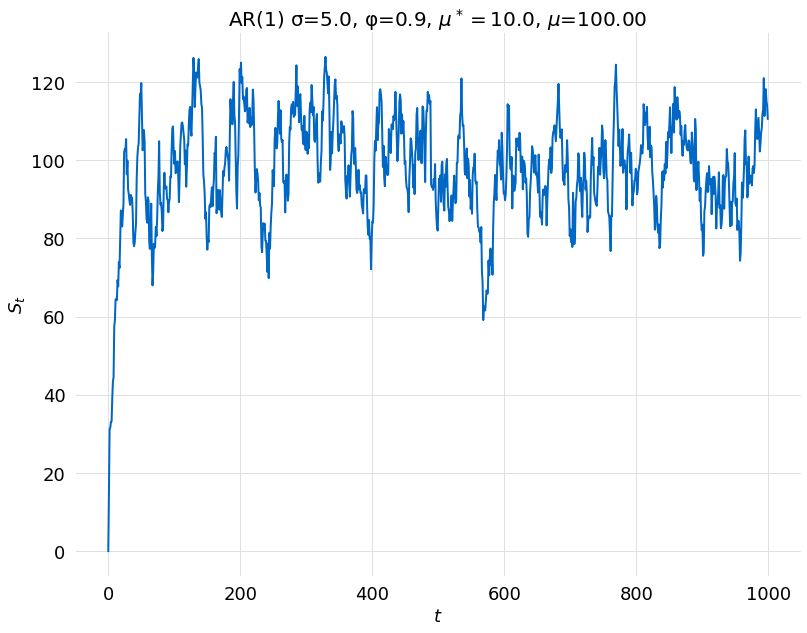

In [17]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
df = arima.arp_offset([φ], μ, nsample, σ)
curve(df, plot_type=DataPlotType.TIME_SERIES, title=title)

In [18]:
results = arima.ar_offset_fit(df, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3062.278
Date:                Sun, 01 May 2022   AIC                           6130.556
Time:                        14:03:08   BIC                           6145.280
Sample:                             0   HQIC                          6136.152
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.0198      3.038     31.609      0.000      90.066     101.974
ar.L1          0.9484      0.005    208.590      0.000       0.939       0.957
sigma2        26.6924      1.129     23.644      0.000      24.480      28.905
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):                71.69
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.28
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
print(df.attrs)

{'S(t)': {'npts': 1000, 'DataType': <DataType.TIME_SERIES: 2>, 'Parameters': {'φ': [0.9], 'δ': [], 'σ': 5.0, 'μ': 10.0, 'γ': 0.0}, 'Description': 'ARIMA(1,0,0) Simulation', 'ylabel': '$S_t$', 'xlabel': '$t$', 'Estimates': [{'Type': <EstType.AR: 'AR'>, 'Const': [10.035606781200805, 0.13313160811101793], 'Parameters': [[0.5271189163831486, 0.02594442547266448]], 'Sigma2': [4.037293272486772, 0.1774942803354843]}, {'Type': <EstType.AR: 'AR'>, 'Const': [96.01981228900755, 3.0377286837204545], 'Parameters': [[0.9483505165631979, 0.004546485353050464]], 'Sigma2': [26.69244778260261, 1.1289180139755368]}], 'Tests': []}, 'Date': '01/05/2022 14:03:08', 'Name': 'ARMA-Simulation-41a8e4f7-172f-4b0b-8baa-20997dc51ec7'}


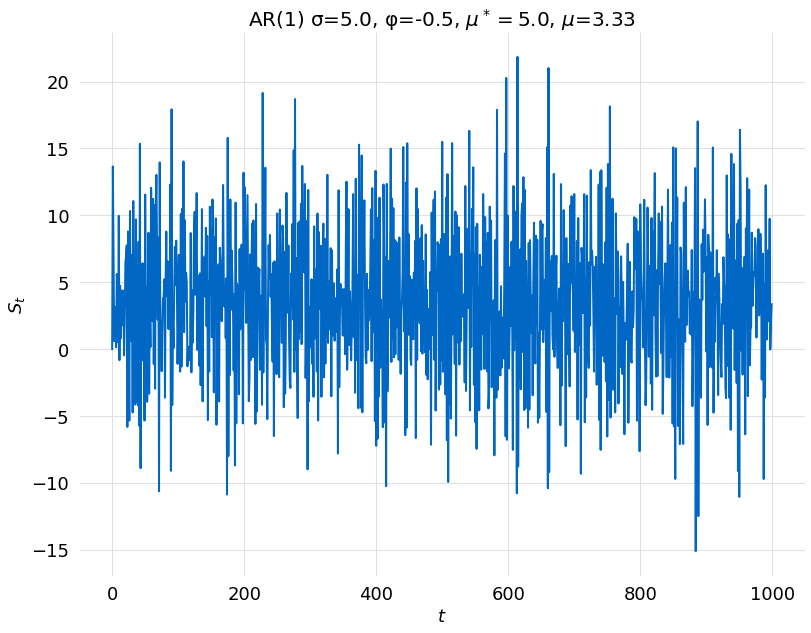

In [20]:
φ = -0.5
μ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
df = arima.arp_offset([φ], μ, nsample, σ)
curve(df, plot_type=DataPlotType.TIME_SERIES, title=title)

In [21]:
results = arima.ar_offset_fit(df, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3023.563
Date:                Sun, 01 May 2022   AIC                           6053.126
Time:                        14:03:08   BIC                           6067.849
Sample:                             0   HQIC                          6058.722
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5364      0.106     33.463      0.000       3.329       3.744
ar.L1         -0.4895      0.027    -17.817      0.000      -0.543      -0.436
sigma2        24.7538      1.180     20.982      0.000      22.442      27.066
===================================================================================
Ljung-Box (L1) (Q):                   1.52   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.22   Prob(JB):                         0.29
Heteroskedasticity (H):               1.09   Skew:                            -0.02
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
print(df.attrs)

{'S(t)': {'npts': 1000, 'DataType': <DataType.TIME_SERIES: 2>, 'Parameters': {'φ': [-0.5], 'δ': [], 'σ': 5.0, 'μ': 5.0, 'γ': 0.0}, 'Description': 'ARIMA(1,0,0) Simulation', 'ylabel': '$S_t$', 'xlabel': '$t$', 'Estimates': [{'Type': <EstType.AR: 'AR'>, 'Const': [10.035606781200805, 0.13313160811101793], 'Parameters': [[0.5271189163831486, 0.02594442547266448]], 'Sigma2': [4.037293272486772, 0.1774942803354843]}, {'Type': <EstType.AR: 'AR'>, 'Const': [96.01981228900755, 3.0377286837204545], 'Parameters': [[0.9483505165631979, 0.004546485353050464]], 'Sigma2': [26.69244778260261, 1.1289180139755368]}, {'Type': <EstType.AR: 'AR'>, 'Const': [3.5364225884343305, 0.10568235034179155], 'Parameters': [[-0.4895411933055999, 0.027475837054599207]], 'Sigma2': [24.7538402189823, 1.1797696126581434]}], 'Tests': []}, 'Date': '01/05/2022 14:03:08', 'Name': 'ARMA-Simulation-1af0e894-250c-4ca6-a053-a167317a25b6'}
